In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv", sep = ',')

In [3]:
ant_prov = pd.DataFrame()
ant_prov['antiguedad'] = data['antiguedad']
ant_prov['provincia'] = data['provincia']
ant_prov = ant_prov.dropna()
ant_prov['count'] = 1
ant_prov = ant_prov.groupby(['antiguedad', 'provincia']).agg({'count':'sum'}).reset_index()

In [4]:
ant_prov

,antiguedad,provincia,count
0,0.0,Aguascalientes,324
1,0.0,Baja California Norte,176
2,0.0,Baja California Sur,990
3,0.0,Campeche,117
4,0.0,Chiapas,336
...,...,...,...
1216,80.0,Nuevo León,1
1217,80.0,San luis Potosí,2
1218,80.0,Sinaloa,1
1219,80.0,Veracruz,2


In [5]:
ant_prov['provincia']

0              Aguascalientes
1       Baja California Norte
2         Baja California Sur
3                    Campeche
4                     Chiapas
                ...          
1216               Nuevo León
1217          San luis Potosí
1218                  Sinaloa
1219                 Veracruz
1220                  Yucatán
Name: provincia, Length: 1221, dtype: object

In [6]:
ant_prov = ant_prov.groupby(['provincia', 'antiguedad']).agg({'count': 'sum'})

In [7]:
ant_prov = ant_prov.reset_index()

In [8]:
len(ant_prov.provincia.unique())

32

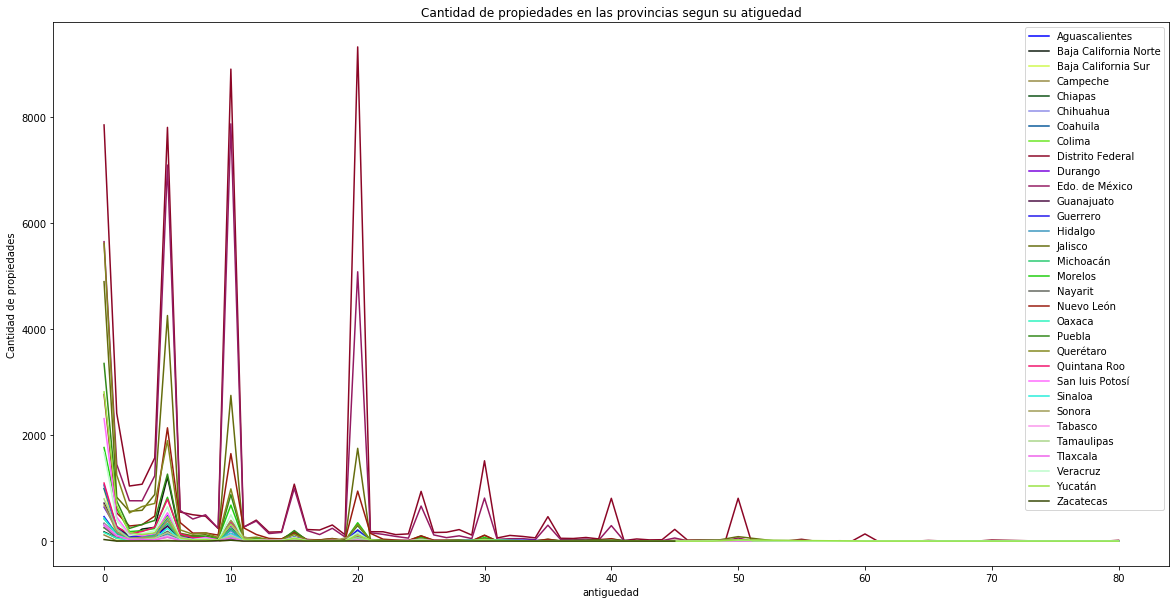

In [9]:
plt.figure(figsize=(50,10))
r = 0
g = 0
b = 1
for prov in ant_prov['provincia'].unique():
    p = ant_prov.loc[ant_prov.provincia == prov, :]
    plt.plot(p['antiguedad'],p['count'], color = (r,g,b,1))
    r = np.random.uniform(low=0, high = 1)
    g = np.random.uniform(low=0, high = 1)
    b = np.random.uniform(low=0, high = 1)



plt.legend(ant_prov.provincia.unique())
plt.ylabel('Cantidad de propiedades')
plt.xlabel('antiguedad')
plt.title('Cantidad de propiedades en las provincias segun su atiguedad')
plt.show()

In [64]:
df_ciu = pd.DataFrame()
df_ciu['antiguedad'] = data['antiguedad']
df_ciu['provincia'] = data['provincia']
df_ciu['ciudad'] = data['ciudad']
df_ciu['count'] = 1
df_ciu = df_ciu.dropna()
df_ciu = df_ciu.groupby(['provincia','ciudad','antiguedad']).agg({'count': 'sum'})
df_ciu = df_ciu.loc['Distrito Federal':'Distrito Federal']

In [65]:
df_ciu

count
provincia        ciudad         antiguedad       
Distrito Federal Alvaro Obregón 0.0          1031
                                1.0           352
                                2.0           141
                                3.0           163
                                4.0           197
...                                           ...
                 otra           5.0             2
                                8.0             1
                                10.0            1
                                15.0            2
                                20.0            2

[800 rows x 1 columns]

In [66]:
df_ciu = df_ciu.reset_index()

In [67]:
df_ciu.drop(columns=['provincia'])

,ciudad,antiguedad,count
0,Alvaro Obregón,0.0,1031
1,Alvaro Obregón,1.0,352
2,Alvaro Obregón,2.0,141
3,Alvaro Obregón,3.0,163
4,Alvaro Obregón,4.0,197
...,...,...,...
795,otra,5.0,2
796,otra,8.0,1
797,otra,10.0,1
798,otra,15.0,2


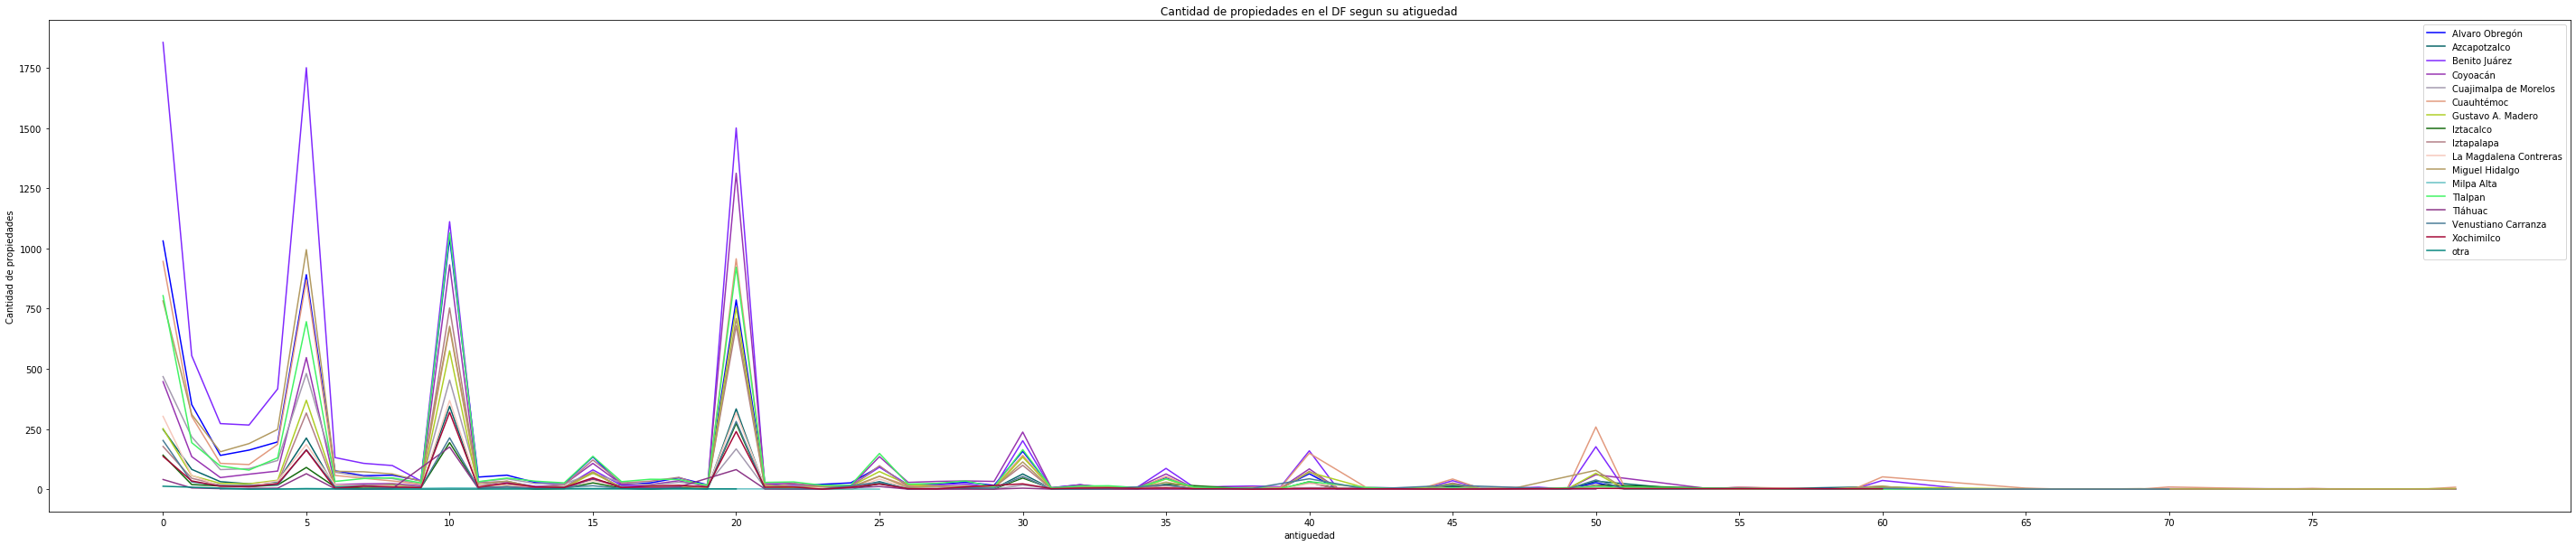

In [97]:
plt.figure(figsize=(50,10))
r = 0
g = 0
b = 1
for ciu in df_ciu['ciudad'].unique():
    p = df_ciu.loc[df_ciu.ciudad == ciu, :]
    plt.plot(p['antiguedad'],p['count'], color = (r,g,b,1))
    r = np.random.uniform(low=0, high = 1)
    g = np.random.uniform(low=0, high = 1)
    b = np.random.uniform(low=0, high = 1)
plt.legend(df_ciu.ciudad.unique())
plt.xticks(np.arange(0, 80, step=5))
plt.ylabel('Cantidad de propiedades')
plt.xlabel('antiguedad')
plt.title('Cantidad de propiedades en el DF segun su atiguedad')
plt.show()


In [69]:
ant_metros_totales = data[['antiguedad', 'metrostotales']]
ant_metros_totales = ant_metros_totales.dropna()

In [70]:
ant_metros_totales

,antiguedad,metrostotales
1,10.0,180.0
2,5.0,166.0
3,1.0,67.0
4,10.0,95.0
5,5.0,90.0
...,...,...
239993,1.0,150.0
239994,3.0,90.0
239996,0.0,250.0
239997,20.0,138.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

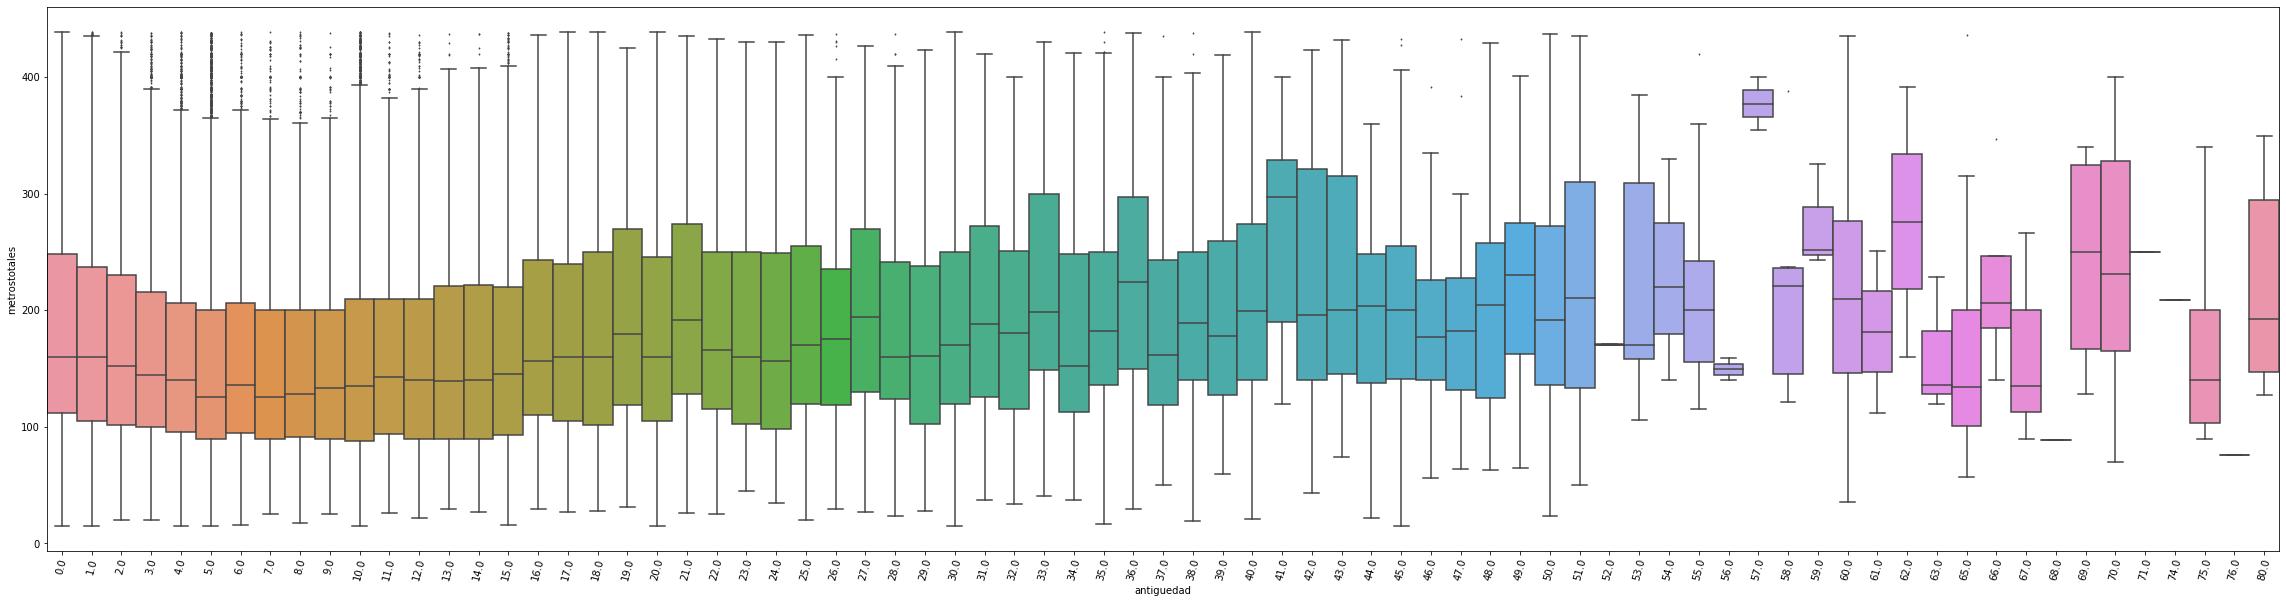

In [99]:
plt.figure(figsize=(40,10))
ax = sns.boxplot(x = ant_metros_totales['antiguedad'], y=ant_metros_totales['metrostotales'], width=1, fliersize =1)
plt.xticks(rotation = 75)

In [75]:
ant_tipo = data[['tipodepropiedad', 'antiguedad']]

In [76]:
ant_tipo.isnull().sum()

tipodepropiedad       46
antiguedad         43555
dtype: int64

In [77]:
ant_tipo = ant_tipo.dropna()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

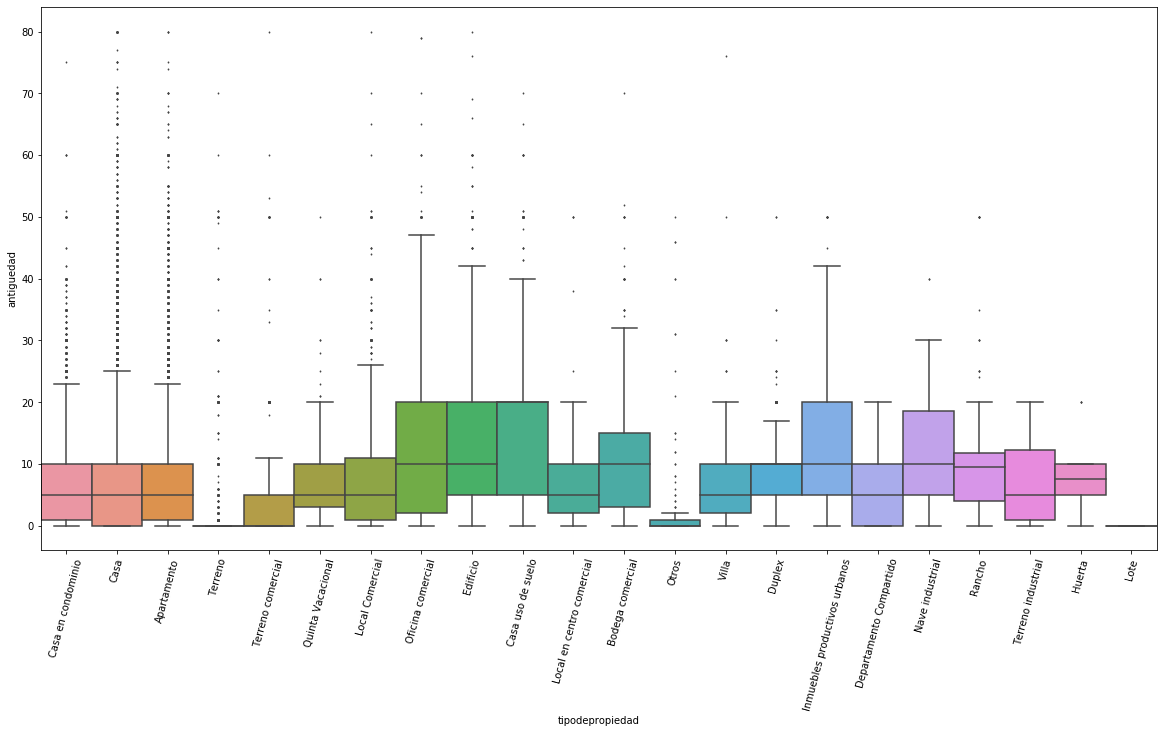

In [89]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x = ant_tipo['tipodepropiedad'], y=ant_tipo['antiguedad'], width=1, fliersize =1)
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

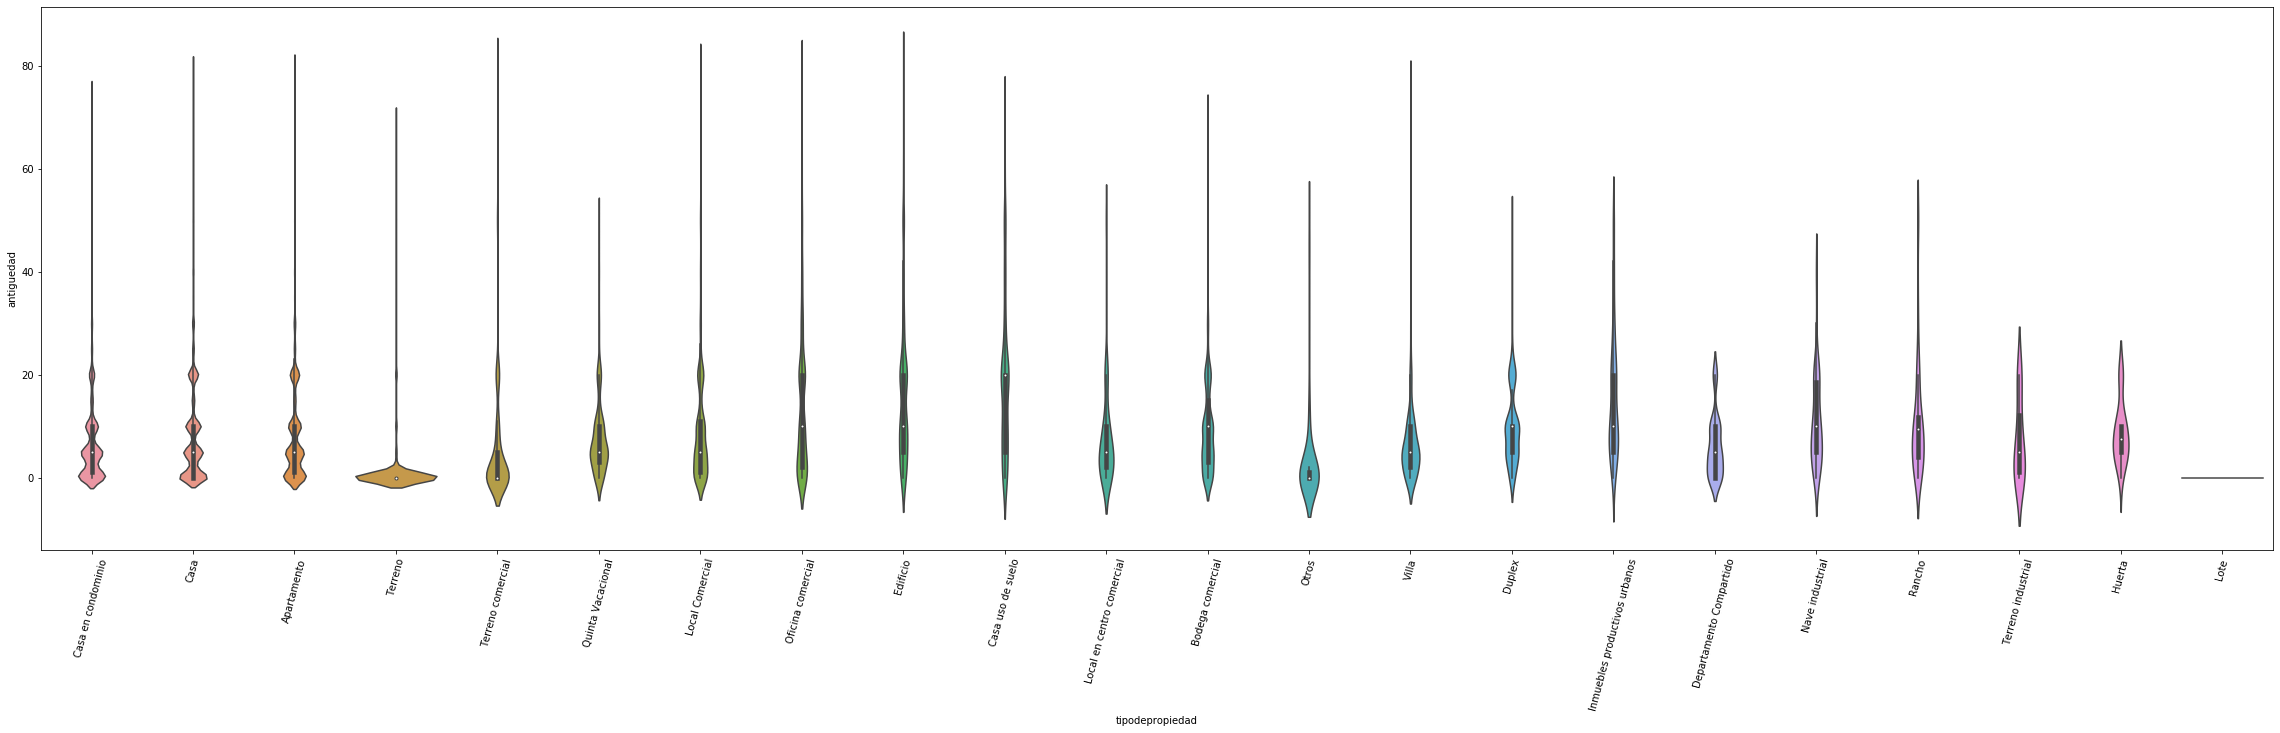

In [101]:
plt.figure(figsize=(40,10))
ax = sns.violinplot(x = ant_tipo['tipodepropiedad'], y= ant_tipo['antiguedad'])
plt.xticks(rotation=75)

In [104]:
ant_habitaciones = data[['antiguedad', 'habitaciones']]
ant_habitaciones = ant_habitaciones.dropna()

In [105]:
ant_habitaciones.head()

,antiguedad,habitaciones
1,10.0,3.0
2,5.0,3.0
3,1.0,2.0
4,10.0,2.0
5,5.0,2.0


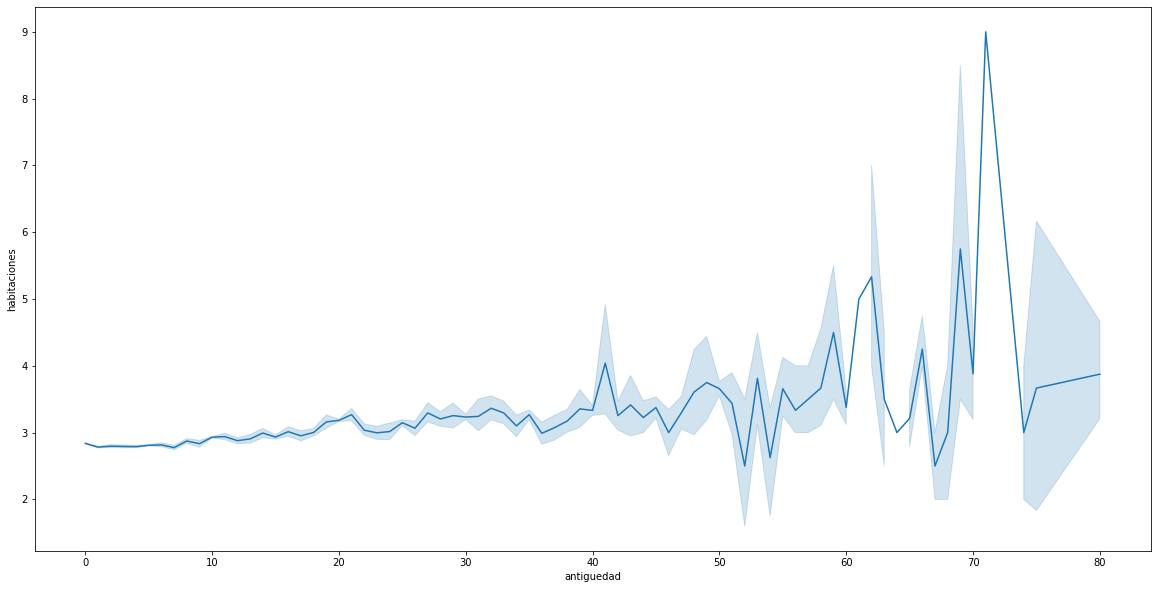

In [109]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x= 'antiguedad', y='habitaciones', data= ant_habitaciones)